In [23]:
import pandas as pd

pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
pr_df

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33591,2857942945,2,fix: improve dark mode input focus and toggle ...,# UI Improvements: Dark Mode Input Focus and T...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T13:57:22Z,2025-02-17T14:40:12Z,2025-02-17T14:40:12Z,934090141,https://api.github.com/repos/jina-ai/deepsearc...,https://github.com/jina-ai/deepsearch-ui/pull/2
33592,2857959763,2154,docs: add required packages to SeleniumScrapin...,Fixes #2153\n\nThe SeleniumScrapingTool docume...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T14:04:15Z,2025-02-25T16:39:21Z,None,710601088,https://api.github.com/repos/crewAIInc/crewAI,https://github.com/crewAIInc/crewAI/pull/2154
33593,2858280902,775,Fix heap buffer overflow in BundlePacket,This PR fixes a heap buffer overflow in Bundle...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T16:15:35Z,2025-02-17T16:23:53Z,None,21134745,https://api.github.com/repos/wolfSSL/wolfssh,https://github.com/wolfSSL/wolfssh/pull/775
33594,2858429985,346,Improve environment variable documentation,# Environment Variable Documentation Improveme...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:19:32Z,2025-02-18T08:32:15Z,2025-02-18T08:32:15Z,894659403,https://api.github.com/repos/goat-sdk/goat,https://github.com/goat-sdk/goat/pull/346


In [61]:
repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/repository.parquet")
repo_df

,id,url,license,full_name,language,forks,stars
0,966235850,https://api.github.com/repos/kizuna-ai-lab/sokuji,AGPL-3.0,kizuna-ai-lab/sokuji,TypeScript,11,254
1,386644013,https://api.github.com/repos/freenet/freenet-core,NOASSERTION,freenet/freenet-core,Rust,94,2391
2,977155585,https://api.github.com/repos/coleam00/mcp-craw...,MIT,coleam00/mcp-crawl4ai-rag,Python,474,1447
3,528194129,https://api.github.com/repos/vexxhost/atmosphere,None,vexxhost/atmosphere,Smarty,34,142
4,703998226,https://api.github.com/repos/JonasKruckenberg/k23,Apache-2.0,JonasKruckenberg/k23,Rust,32,515
...,...,...,...,...,...,...,...
2802,569880246,https://api.github.com/repos/reservoirprotocol...,MIT,reservoirprotocol/marketplace-v2,TypeScript,201,159
2803,28928522,https://api.github.com/repos/wolfSSL/wolfssl,GPL-3.0,wolfSSL/wolfssl,C,882,2562
2804,840078948,https://api.github.com/repos/nexus-xyz/nexus-cli,Apache-2.0,nexus-xyz/nexus-cli,Rust,462,887
2805,17404938,https://api.github.com/repos/domaframework/doma,Apache-2.0,domaframework/doma,Java,71,480


In [62]:
missing_repos = pr_df['repo_id'].isna() | (pr_df['repo_id'] == '')
print('Are there any missing repo_ids in pr dataset:', missing_repos.any())

Are there any missing repo_ids in pr dataset: False


In [12]:
missing_ids = repo_df['id'].isna() | (repo_df['id'] == '')
print('Are there any missing ids in repo dataset', missing_ids.any())

Are there any missing ids in repo dataset False


In [63]:
missing_ids = repo_df['language'].isna() | (repo_df['language'] == '')
print('Are there any missing language in repo dataset', missing_ids.any())

Are there any missing language in repo dataset True


From the above we can see that there are missing language values in the repo dataset, so some of the repos we don't know what language they are. There isn't a way for us to easily get this data, as if they are private we cannot see them. Let's see how many repos are missing languages.

In [64]:
repo_df.loc[repo_df['language'].isna() | (repo_df['language'] == '')].count()

id           37
url          37
license      29
full_name    37
language      0
forks        37
stars        37
dtype: int64

There are 37 repos that do not have a language, out of 2807, a small number so it's probably safe to remove those repos from the database

In [65]:
import numpy as np

repo_df['language'] = repo_df['language'].replace('', np.nan)
repo_df = repo_df.dropna(subset=['language'])
repo_df

,id,url,license,full_name,language,forks,stars
0,966235850,https://api.github.com/repos/kizuna-ai-lab/sokuji,AGPL-3.0,kizuna-ai-lab/sokuji,TypeScript,11,254
1,386644013,https://api.github.com/repos/freenet/freenet-core,NOASSERTION,freenet/freenet-core,Rust,94,2391
2,977155585,https://api.github.com/repos/coleam00/mcp-craw...,MIT,coleam00/mcp-crawl4ai-rag,Python,474,1447
3,528194129,https://api.github.com/repos/vexxhost/atmosphere,None,vexxhost/atmosphere,Smarty,34,142
4,703998226,https://api.github.com/repos/JonasKruckenberg/k23,Apache-2.0,JonasKruckenberg/k23,Rust,32,515
...,...,...,...,...,...,...,...
2802,569880246,https://api.github.com/repos/reservoirprotocol...,MIT,reservoirprotocol/marketplace-v2,TypeScript,201,159
2803,28928522,https://api.github.com/repos/wolfSSL/wolfssl,GPL-3.0,wolfSSL/wolfssl,C,882,2562
2804,840078948,https://api.github.com/repos/nexus-xyz/nexus-cli,Apache-2.0,nexus-xyz/nexus-cli,Rust,462,887
2805,17404938,https://api.github.com/repos/domaframework/doma,Apache-2.0,domaframework/doma,Java,71,480


We check to make sure we only have 2807 - 37 = 2770 rows left which is correct

In [54]:
# Now we will get a count of how many repos use each language
repos_per_language = repo_df['language'].value_counts()
repos_per_language

language
TypeScript       650
Python           530
Go               242
C#               220
JavaScript       190
                ... 
Nushell            1
PLpgSQL            1
Nextflow           1
JetBrains MPS      1
Jsonnet            1
Name: count, Length: 85, dtype: int64

We can see that there are about 85 different languages used in all the repos, and their varying levels of popularity

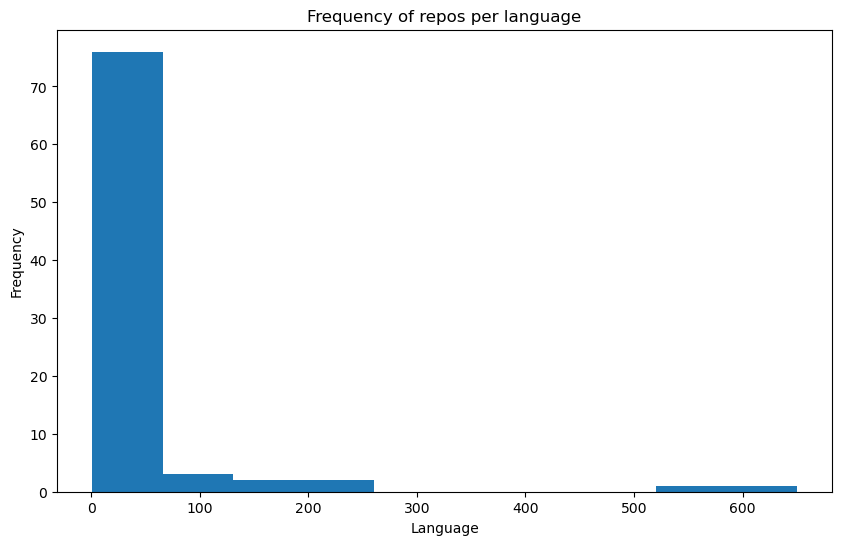

In [55]:
#85 is too many to show on a graph so we'll show all repo frequncies with frequency over 10

import matplotlib.pyplot as plt

filtered_repos = repo_df['language']

plt.figure(figsize=(10, 6))
plt.hist(repos_per_language)
plt.xlabel("Language")
plt.ylabel("Frequency")
plt.title("Frequency of repos per language")
plt.show()

We check to make sure we only have 2807 - 37 = 2770 rows left which is correct

In [29]:
# Because there are no missing repo_ids or ids in both data sets, it is safe to join them on those columns
merged_df = pd.merge(pr_df, repo_df, left_on='repo_id', right_on='id', how='inner')
merged_df

,id_x,number,title,body,agent,user_id,user,state,created_at,closed_at,...,repo_id,repo_url,html_url,id_y,url,license,full_name,language,forks,stars
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,...,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911,191751505,https://api.github.com/repos/milvus-io/pymilvus,Apache-2.0,milvus-io/pymilvus,Python,368,1230
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,...,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2,1025472321,https://api.github.com/repos/classmethod/tsumiki,MIT,classmethod/tsumiki,TypeScript,21,391
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,...,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30,988488798,https://api.github.com/repos/steipete/Peekaboo,MIT,steipete/Peekaboo,Swift,19,505
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,...,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...,999285986,https://api.github.com/repos/sugyan/claude-cod...,MIT,sugyan/claude-code-webui,TypeScript,90,367
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,...,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625,537233603,https://api.github.com/repos/paradigmxyz/reth,Apache-2.0,paradigmxyz/reth,Rust,1746,4835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,2857942945,2,fix: improve dark mode input focus and toggle ...,# UI Improvements: Dark Mode Input Focus and T...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T13:57:22Z,2025-02-17T14:40:12Z,...,934090141,https://api.github.com/repos/jina-ai/deepsearc...,https://github.com/jina-ai/deepsearch-ui/pull/2,934090141,https://api.github.com/repos/jina-ai/deepsearc...,Apache-2.0,jina-ai/deepsearch-ui,JavaScript,19,119
33409,2857959763,2154,docs: add required packages to SeleniumScrapin...,Fixes #2153\n\nThe SeleniumScrapingTool docume...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T14:04:15Z,2025-02-25T16:39:21Z,...,710601088,https://api.github.com/repos/crewAIInc/crewAI,https://github.com/crewAIInc/crewAI/pull/2154,710601088,https://api.github.com/repos/crewAIInc/crewAI,MIT,crewAIInc/crewAI,Python,4696,35096
33410,2858280902,775,Fix heap buffer overflow in BundlePacket,This PR fixes a heap buffer overflow in Bundle...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T16:15:35Z,2025-02-17T16:23:53Z,...,21134745,https://api.github.com/repos/wolfSSL/wolfssh,https://github.com/wolfSSL/wolfssh/pull/775,21134745,https://api.github.com/repos/wolfSSL/wolfssh,None,wolfSSL/wolfssh,C,93,428
33411,2858429985,346,Improve environment variable documentation,# Environment Variable Documentation Improveme...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:19:32Z,2025-02-18T08:32:15Z,...,894659403,https://api.github.com/repos/goat-sdk/goat,https://github.com/goat-sdk/goat/pull/346,894659403,https://api.github.com/repos/goat-sdk/goat,MIT,goat-sdk/goat,TypeScript,255,798


We only have 33413 rows left after the merge, down from 33596 of the original pr dataset, which means 183 of the pr were for the repos that we did not have language data on. Since it's such a small number compared to the total, like the repos missing language, it's probably safe to drop all those prs.

In [32]:
# From above we can now see every pr now has a value in the language column, let's check if there's missing data again
missing_language = merged_df['language'].isna() | (merged_df['language'] == '')
print('Are there any missing language in repo dataset', missing_language.any())

Are there any missing language in repo dataset False


In [34]:
# There are no missing language so now we can calculate frequency of prs per language
pr_per_language = merged_df['language'].value_counts()
pr_per_language

language
Go            10108
Python         7191
TypeScript     6503
C#             1985
Java           1278
              ...  
Fortran           1
MLIR              1
Jsonnet           1
PLpgSQL           1
Nushell           1
Name: count, Length: 85, dtype: int64

We can see just by comparing the frequency counts the most frequent pr languages are not the same as the most frequent repo languages. Now we can get an estimate of AI agent adoption by calculating average ai pr per repo

In [45]:
ai_pr_per_rep = pr_per_language/repos_per_language
ai_pr_per_rep = ai_pr_per_rep.sort_values(ascending=False)
ai_pr_per_rep

language
Circom      63.000000
Zig         46.666667
Nim         43.000000
Go          41.768595
MoonBit     41.000000
              ...    
Nushell      1.000000
PLpgSQL      1.000000
Mustache     1.000000
Move         1.000000
Starlark     1.000000
Name: count, Length: 85, dtype: float64

From above we can see which languages have the highest average number of ai agent prs per repo, showing relative AI adoption based on language.